# IFN619 Assignment 2 - Insight Report

#### n10153900 Yui Andoh

## 1. Summary

Businesses are required to grow continuously to maintain or gain more profit, and without that effort, they are likely to become obsolete in the society. In order to survive in the competition with other companies in the same industry, it is of great importance for businesses to understand current thoughts/needs people have and respond to them. News provides latest information about what is happening in the world, and as it has a major impact on the topic people talk about, news can even reflect the topics that people are interested. This means that analyzing news topics provides a good insight about people's current interest and thoughts, which will help business to surpass others by grasping what is desired in the community. Also, news provides various topics and it can pinpoint the economic trend which affects business profit. This insight report challenges to answer what topics come up in the national conversation by analyzing top news topics in Australia. The analysis employs sentiment analysis of news topics after topic modeling, and then compares the news sentiment with economic indicators to highlight the impact of news sentiment and news topic to Australian economy. The result shows that people's sentiment towards all topic categories are correlated, especially the sentiments about politics, economy and finance show similar transitions. Furthermore, the analysis suggests correlation between news sentiment and two economic indicators (unemployment rate and housing prices) through comparison between economic indicators and news sentiments.

## 2. Problem Space

**What were the top Australian news topics over the last decade, and what can these say about the national conversation?**

News analysis provides useful information and various insight about the world. Business often faces decision making, and analyzing news topics helps them to see the market trend and can possibly bring further business opportunities. What makes news analysis important in business is that news reports are what people watch and listen to in their daily life, and that they have such a significant influence over the topic people talk about that it is no exaggeration to say that news reports represent hot topics among people. As news reports have a big influence over what people talk about, it is possible to anticipate what is spoken among people by analyzing what is often reported. The topics people talk about are what they are interested in or concerned about at the time, and creating a business strategy on those topics will draw their attention to the business, and allow the business to enhance their recognition or gain the revenue. 

In addition, analyzing the news trend will provide businesses with the insight for the correlation between some topics, such as the impact from policies to the economy. Finding those correlation between iconic incidents will enable businesses to predict the influence that a certain incident will bring in the future, and to prepare and take measures for it. It is a great advantage for business to be able to foresee what can happen in the future by picking up what is happening now based on the past news analysis. This will prevent the business to get affected significantly by the delay of planning countermeasures, which often causes a financial loss for a company, and will help their business management in terms of high-level company decision making. The insight that will be obtained from this question will benefit people who engage in marketing or sales in businesses, and eventually managers.

However, analyzing news is not an easy task to do, as it is not a numerical data and each news report has a different content. The sentence and wording used in each news article can be different from the other articles that mention the same or similar incidents. The analysis requires news records in human language to be processed into a form that a machine can understand.

To give an answer to this question, this analysis takes advantage of some techniques about natural language processing. The following section categorizes news headlines of the past decade into 1) several topics and 2) published quarters using topic modeling, and analyze headlines in each category based on sentiments. After that, the result of sentiment analysis is combined with some external data that indicates economical situation in Australia, to see the impact that hot topics and the Australian economy can bring to each other.

## 3. Detailed Analysis
To provide the analysis for this question, I used the open data sourced from ABC (Australian Broadcasting Corp.) again to start from. (Kulkarni & Rohit, 2018). This data contains more than a million news headlines from 2003 till the end of 2019, and the data used in this analysis only contains headlines of the news in the past dacade, discarding headlines until 2009 beforehand. The following code reads the entire CSV file and turns it into a pandas dataframe, and then formats words related to nationality that don’t get stemmed by algorithm that the analysis employs.

In [1]:
# Install necessary packages
import sys
!{sys.executable} -m pip install gensim
!{sys.executable} -m pip install -U nltk
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install smart-open==1.10.0
!{sys.executable} -m pip install -U textblob

  Using cached gensim-3.8.3-cp37-cp37m-manylinux1_x86_64.whl (24.2 MB)
Processing /home/jovyan/.cache/pip/wheels/bb/1c/9c/412ec03f6d5ac7d41f4b965bde3fc0d1bd201da5ba3e2636de/smart_open-2.0.0-py3-none-any.whl
  Using cached boto-2.49.0-py2.py3-none-any.whl (1.4 MB)
     |████████████████████████████████| 128 kB 11.9 MB/s eta 0:00:01
  Using cached s3transfer-0.3.3-py2.py3-none-any.whl (69 kB)
  Using cached jmespath-0.10.0-py2.py3-none-any.whl (24 kB)
     |████████████████████████████████| 6.2 MB 19.8 MB/s eta 0:00:01
  Using cached docutils-0.15.2-py3-none-any.whl (547 kB)
  Attempting uninstall: docutils
    Found existing installation: docutils 0.16
    Uninstalling docutils-0.16:
      Successfully uninstalled docutils-0.16
Processing /home/jovyan/.cache/pip/wheels/45/6c/46/a1865e7ba706b3817f5d1b2ff7ce8996aabdd0d03d47ba0266/nltk-3.5-py3-none-any.whl
  Using cached regex-2020.5.14-cp37-cp37m-manylinux2010_x86_64.whl (675 kB)
  Using cached wordcloud-1.7.0-cp37-cp37m-manylinux1_x86_64

In [2]:
# Import necessary libraries
import re
import pandas as pd
#import glob
from tqdm import tqdm

# For topic modeling
import gensim
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.corpora.textcorpus import remove_stopwords
from gensim.models.ldamodel import LdaModel
#import nltk
from nltk.stem.snowball import SnowballStemmer
import gensim
from gensim.models.phrases import Phrases, Phraser
from gensim.models import CoherenceModel

# For visualization
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #, STOPWORDS

In [3]:
pd.set_option("display.max_colwidth", 100)
df = pd.read_csv('abcnews-date-text-from-2010_n10153900_YuiAndoh.csv')
df['headline_text'] = df['headline_text'].str.replace('australians', 'australian').str.replace('australian', 'australia').str.replace('chinese', 'china')
df

,publish_date,headline_text
0,20100101,12m degas stolen from museum
1,20100101,17 die in bangladesh bus crash
2,20100101,2010 to be drier after very wet 2009
3,20100101,37 catholic workers killed worldwide
4,20100101,600 hurt in philippine new year revelry
...,...,...
675708,20191231,vision of flames approaching corryong in victoria
675709,20191231,wa police and government backflip on drug amnesty bins
675710,20191231,we have fears for their safety: victorian premier
675711,20191231,when do the 20s start


The given data above only contains published dates and headlines. Before the analysis jump into the topic modeling, the following code add a list of delimited and stemmed (lemmatized) words to each row, as is done in Assignment 1.

In [4]:
# Tokenization and stopword removal for all headlines
df['terms'] = [remove_stopwords(simple_preprocess(story, min_len=3)) for story in tqdm(df['headline_text'])]
stemmer = SnowballStemmer("english")

# Stem every word and drop terms column as it is no longer necessary
tqdm.pandas()
df['stemmed'] = df['terms'].progress_apply(lambda x: [stemmer.stem(y) for y in x])
df = df.drop(['terms'], axis=1)
df

100%|██████████| 675713/675713 [00:07<00:00, 92524.78it/s] 
/opt/conda/lib/python3.7/site-packages/tqdm/std.py:658: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 675713/675713 [00:44<00:00, 15337.50it/s]


,publish_date,headline_text,stemmed
0,20100101,12m degas stolen from museum,"[dega, stolen, museum]"
1,20100101,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]"
2,20100101,2010 to be drier after very wet 2009,"[drier, wet]"
3,20100101,37 catholic workers killed worldwide,"[cathol, worker, kill, worldwid]"
4,20100101,600 hurt in philippine new year revelry,"[hurt, philippin, new, year, revelri]"
...,...,...,...
675708,20191231,vision of flames approaching corryong in victoria,"[vision, flame, approach, corryong, victoria]"
675709,20191231,wa police and government backflip on drug amnesty bins,"[polic, govern, backflip, drug, amnesti, bin]"
675710,20191231,we have fears for their safety: victorian premier,"[fear, safeti, victorian, premier]"
675711,20191231,when do the 20s start,[start]


In human languages, there are some words that tend to appear with another specific word, which is called n-grams. The following addresses bigrams, which are common terms composed of two words (such as names of famous figures), and add another column in a dataframe where some words are replaced by bigrams made by gensim library.

In [5]:
# Build a bigram model
bigram = Phrases(tqdm(df['stemmed'].tolist()), min_count=5, threshold=200) # higher threshold fewer phrases.

df['with_bigrams'] = bigram[tqdm(df['stemmed'])]
df.head(10)

100%|██████████| 675713/675713 [00:14<00:00, 45634.80it/s]


,publish_date,headline_text,stemmed,with_bigrams
0,20100101,12m degas stolen from museum,"[dega, stolen, museum]","[dega, stolen, museum]"
1,20100101,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]","[die, bangladesh, bus, crash]"
2,20100101,2010 to be drier after very wet 2009,"[drier, wet]","[drier, wet]"
3,20100101,37 catholic workers killed worldwide,"[cathol, worker, kill, worldwid]","[cathol, worker, kill, worldwid]"
4,20100101,600 hurt in philippine new year revelry,"[hurt, philippin, new, year, revelri]","[hurt, philippin, new, year, revelri]"
5,20100101,abbott vows to turn back asylum seekers,"[abbott, vow, turn, asylum, seeker]","[abbott, vow, turn, asylum_seeker]"
6,20100101,accused refused bail over deakin break in,"[accus, refus, bail, deakin, break]","[accus, refus_bail, deakin, break]"
7,20100101,agforce opposes great barrier reef run off,"[agforc, oppos, great, barrier, reef, run]","[agforc, oppos, great_barrier, reef, run]"
8,20100101,airport security stripped bare,"[airport, secur, strip, bare]","[airport, secur, strip, bare]"
9,20100101,alcohol related injuries flood qld emergency wards,"[alcohol, relat, injuri, flood, qld, emerg, ward]","[alcohol, relat, injuri, flood, qld, emerg, ward]"


As you can see in the sixth row in the dataframe in with_bigram column, some words are combined with an underscore. This way, the program sees a bigram as one word that conveys more meaning than when they are separate.

Based on stemmed words obtained above, the code down below creates a dictionary and a corpus for topic modeling using LDA (Latent Dirichlet Allocation) model. However, as LDA is not a supervised machine learning model, it does not categorize headlines based on one clear criteria that is obtained from a dataset, and it is a job for humans to determine the number of topics and what each topic model is about. Therefore, before naming topic models, I take one more steps to evaluate LDA models with different numbers of topics. The following calculates coherence scores that show how easy for humans to understand what topic is all about. The code below takes u-mass measure to assess the models.

In [6]:
vocab = Dictionary(tqdm(df['with_bigrams']))
corpus = [vocab.doc2bow(words) for words in tqdm(df['with_bigrams'])]  

100%|██████████| 675713/675713 [00:04<00:00, 156936.70it/s]


In [7]:
# Computing function of coherence scores using u-mass measure
def compute_coherence_values(vocab, corpus, texts, limit, start, step):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=tqdm(corpus), id2word=vocab, num_topics=num_topics, random_state=50, iterations = 1000)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=vocab, coherence='c_v')
#        coherencemodel = CoherenceModel(model=model, corpus=corpus, dictionary=vocab, coherence='u_mass')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [8]:
# Calculates coherence scores from two to ten topics- Takes about 20 minutes to finish
model_list, coherence_values = compute_coherence_values(vocab=vocab, corpus=corpus, texts=df['with_bigrams'].tolist(), start=2, limit=11, step=1)

100%|██████████| 675713/675713 [01:42<00:00, 6622.77it/s]


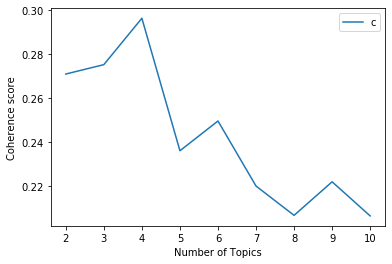

In [9]:
# Show a graph
limit=11; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

The result shows that the model distinguishes the topic the most when the number of topics is four, and the score decreases as the number of topics increases. I choose four topics for LDA models here as it marked the highest score, although the score itself is not very high.

In [10]:
# Create an lda model from corpus and vocab - takes a couple of minutes
lda_model = LdaModel(corpus=tqdm(corpus), id2word=vocab, num_topics=4, random_state=50, iterations = 1000)

100%|██████████| 675713/675713 [01:51<00:00, 6056.91it/s]


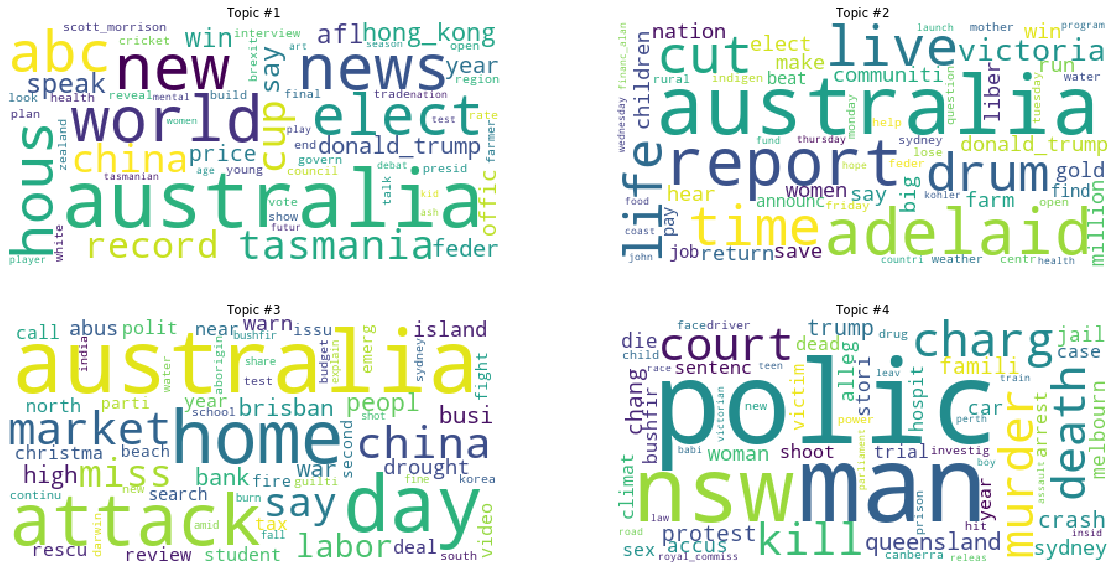

In [11]:
# View the topics in the model
plt.figure(figsize=(20,10))
for t in range(lda_model.num_topics):
    plt.subplot(2,2,t+1)
    x = dict(lda_model.show_topic(t,60))
    im = WordCloud(background_color="white").generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t+1))

plt.savefig('wordcloud.png')

This is wordcloud images which contain top 60 topical words for each topic. From this visualization, each topic seems to be related to topics as follows:

 - Topic 1: Politics (world, china, hong_kong,  elect, win, brexit, scott_morrison, donald_trump)
 - Topic 2: Finance (million, drum, cut, financ_alan, pay, farm, fund)
 - Topic 3: Economy (china, market, business, labor, bank, war, draught)
 - Topic 4: Crimes and accidents (police, charge, kill, death, murder, court)

With these topics, the following code assigns a topic ID to each headline. Topic ID from 1 to 4 corresponds the topic categories I specified above.

In [12]:
# Functions to get a topic id for each headline
def take_second(elem):
    return elem[1]

def get_topic_id(idx):
    doc_topics = lda_model.get_document_topics(corpus[idx])
    doc_topics_sorted = sorted(doc_topics, reverse = True, key = take_second)
    top_topic_id = doc_topics_sorted[0][0]+1
    return top_topic_id

In [13]:
# Apply the model to our original dataframe - takes a couple of minutes
df['topicid'] = df.index.map(get_topic_id)
df

,publish_date,headline_text,stemmed,with_bigrams,topicid
0,20100101,12m degas stolen from museum,"[dega, stolen, museum]","[dega, stolen, museum]",2
1,20100101,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]","[die, bangladesh, bus, crash]",4
2,20100101,2010 to be drier after very wet 2009,"[drier, wet]","[drier, wet]",1
3,20100101,37 catholic workers killed worldwide,"[cathol, worker, kill, worldwid]","[cathol, worker, kill, worldwid]",2
4,20100101,600 hurt in philippine new year revelry,"[hurt, philippin, new, year, revelri]","[hurt, philippin, new, year, revelri]",4
...,...,...,...,...,...
675708,20191231,vision of flames approaching corryong in victoria,"[vision, flame, approach, corryong, victoria]","[vision, flame, approach, corryong, victoria]",1
675709,20191231,wa police and government backflip on drug amnesty bins,"[polic, govern, backflip, drug, amnesti, bin]","[polic, govern, backflip, drug, amnesti, bin]",4
675710,20191231,we have fears for their safety: victorian premier,"[fear, safeti, victorian, premier]","[fear, safeti, victorian, premier]",4
675711,20191231,when do the 20s start,[start],[start],2


The number of headlines in each topic is shown in a table below.

In [14]:
df_topic = df.groupby(['topicid']).count().drop(columns = ['headline_text', 'stemmed', 'with_bigrams'])
df_topic.index = ['Politics', 'Finance', 'Economy', 'Crimes and Accidents']
df_topic.columns = ['Number of headlines']

display(df_topic)

,Number of headlines
Politics,172189
Finance,167547
Economy,147809
Crimes and Accidents,188168


With the topic labeling done, I divide the data into quarters to quantify the frequency of the appearance of news headlines about each topic. Assignment 1 employed annual analysis, however, by seeing quarterly, the analysis can show better transition of numbers. Another reason for doing quarterly analysis is that the data to be combined later on is also quarterly data and it is easy to see the correlation when all data has the same label for the time period.

In [15]:
# Add year and month columns in the dataframe
df['year'] = df['publish_date'].astype(str).str[0:4]
df['month'] = df['publish_date'].astype(str).str[4:6]

# Assign first, second, third and fourth quarter based on the value in month column
ARR = []

for m in df['month']:
    if (m == '01' or m == '02' or m == '03'):
        ARR.append('first')
    elif (m == '04' or m == '05' or m == '06'):
        ARR.append('second')
    elif (m == '07' or m == '08' or m == '09'):
        ARR.append('third')
    else:
        ARR.append('fourth')
        
df['quarter'] = pd.Series(ARR)
df

,publish_date,headline_text,stemmed,with_bigrams,topicid,year,month,quarter
0,20100101,12m degas stolen from museum,"[dega, stolen, museum]","[dega, stolen, museum]",2,2010,01,first
1,20100101,17 die in bangladesh bus crash,"[die, bangladesh, bus, crash]","[die, bangladesh, bus, crash]",4,2010,01,first
2,20100101,2010 to be drier after very wet 2009,"[drier, wet]","[drier, wet]",1,2010,01,first
3,20100101,37 catholic workers killed worldwide,"[cathol, worker, kill, worldwid]","[cathol, worker, kill, worldwid]",2,2010,01,first
4,20100101,600 hurt in philippine new year revelry,"[hurt, philippin, new, year, revelri]","[hurt, philippin, new, year, revelri]",4,2010,01,first
...,...,...,...,...,...,...,...,...
675708,20191231,vision of flames approaching corryong in victoria,"[vision, flame, approach, corryong, victoria]","[vision, flame, approach, corryong, victoria]",1,2019,12,fourth
675709,20191231,wa police and government backflip on drug amnesty bins,"[polic, govern, backflip, drug, amnesti, bin]","[polic, govern, backflip, drug, amnesti, bin]",4,2019,12,fourth
675710,20191231,we have fears for their safety: victorian premier,"[fear, safeti, victorian, premier]","[fear, safeti, victorian, premier]",4,2019,12,fourth
675711,20191231,when do the 20s start,[start],[start],2,2019,12,fourth


The following analyzes sentiment of headlines. The code takes advantage of TextBlob library which provides an API for lexicon-based sentiment analysis. Before starting the sentiment analysis, the following code divides the dataframe into four smaller dataframes based on the topic number.

In [16]:
# Divide the dataframe into four based on the topic label
df1 = df[df.topicid == 1].reset_index().drop(['index'], axis=1)
df2 = df[df.topicid == 2].reset_index().drop(['index'], axis=1)
df3 = df[df.topicid == 3].reset_index().drop(['index'], axis=1)
df4 = df[df.topicid == 4].reset_index().drop(['index'], axis=1)

The following code cells define a function for getting polarity values using TextBlob library. Polarity is an indicator to show whether the statement is positive or negative in a scale from 1 to -1, where 1 is the most positive and -1 is the most negative evaluation.

In [17]:
from textblob import TextBlob

def get_polarity(dataframe):
    arr = []
    for string in tqdm(dataframe["headline_text"]):
        testimonial = TextBlob(string)
        arr.append(testimonial.sentiment.polarity)
    dataframe['prediction'] = pd.Series(arr)
    return dataframe

From the polarity value obtained above, the following piece of code judges the sentiment to be positive, neutral or negative. When the the value is a positive number, the headline is labeled to be positive, and when the value is a negative number, the headline is labeled as negtive. Neutral headlines are the ones whose polarity values are zero.

In [18]:
def judge_sentiment(dataframe):
    arr = []
    for polarity in dataframe['prediction']:
        if (polarity > 0):
            arr.append('positive')
        elif (polarity < 0):
            arr.append('negative')
        else:
            arr.append('neutral')
    dataframe['sentiment'] = pd.Series(arr)
    return dataframe

In [19]:
# Label all divided dataframes with sentiments - takes a couple of minutes
df_list = [df1, df2, df3, df4]

for df in df_list:
    df = get_polarity(df)
    df = judge_sentiment(df)

100%|██████████| 188168/188168 [00:25<00:00, 7452.86it/s]


Now that the sentiment labeling is done, the following function counts the number of headlines based on year and quarter. The code also groups headlines by sentiment, and returns a new dataframe. The output example of this code is shown below.

In [20]:
def sum_up_sentiment(dataframe):

    df_dummy = dataframe.drop(columns = ['publish_date', 'headline_text', 'stemmed', 'with_bigrams', 'topicid', 'month'])

    df_quarter = pd.DataFrame()

    for y in range(2010, 2020):
        df_first = df_dummy[(df_dummy["year"] == str(y)) & (df_dummy["quarter"] == "first")].groupby(['sentiment']).count().drop(columns = ['year', 'quarter'])
        df_first.columns = [str(y)+'first']
    
        df_second = df_dummy[(df_dummy["year"] == str(y)) & (df_dummy["quarter"] == "second")].groupby(['sentiment']).count().drop(columns = ['year', 'quarter'])
        df_second.columns = [str(y)+'second']
    
        df_third = df_dummy[(df_dummy["year"] == str(y)) & (df_dummy["quarter"] == "third")].groupby(['sentiment']).count().drop(columns = ['year', 'quarter'])
        df_third.columns = [str(y)+'third']
    
        df_fourth = df_dummy[(df_dummy["year"] == str(y)) & (df_dummy["quarter"] == "fourth")].groupby(['sentiment']).count().drop(columns = ['year', 'quarter'])
        df_fourth.columns = [str(y)+'fourth']
    
        df_quarter = df_quarter.append([df_first.T, df_second.T, df_third.T, df_fourth.T])
    
    df_quarter = df_quarter.T
    
    return df_quarter

In [21]:
# Apply the function to all dataframes with different topics
df1_stm = sum_up_sentiment(df1)
df2_stm = sum_up_sentiment(df2)
df3_stm = sum_up_sentiment(df3)
df4_stm = sum_up_sentiment(df4)

# What do we get by running the code above? (Topic 1: Politics)
df1_stm

,2010first,2010second,2010third,2010fourth,2011first,2011second,2011third,2011fourth,2012first,2012second,...,2017third,2017fourth,2018first,2018second,2018third,2018fourth,2019first,2019second,2019third,2019fourth
sentiment,,,,,,,,,,,,,,,,,,,,,
negative,450,431,445,422,409,436,395,458,464,500,...,416,352,306,328,267,255,237,284,245,204
neutral,3494,3753,3948,3113,3374,3617,3477,3933,4374,4473,...,1985,1771,1611,1619,1522,1444,1300,1484,1453,1291
positive,785,719,785,805,795,767,792,877,996,960,...,700,634,498,593,505,492,420,505,574,565


As it is obvious from the analysis in Assignment 1 that the number of total headlines are decreasing year by year, the following calculates the percentage of positive, negative and neutral headlines in each quarter, and then shows percent stacked bar charts.

In [22]:
df1_stm_rate = df1_stm.apply(lambda x:x/sum(x),axis=0)
df2_stm_rate = df2_stm.apply(lambda x:x/sum(x),axis=0)
df3_stm_rate = df3_stm.apply(lambda x:x/sum(x),axis=0)
df4_stm_rate = df4_stm.apply(lambda x:x/sum(x),axis=0)

# What do we get by running the code above? (Topic 1: Politics)
df1_stm_rate

,2010first,2010second,2010third,2010fourth,2011first,2011second,2011third,2011fourth,2012first,2012second,...,2017third,2017fourth,2018first,2018second,2018third,2018fourth,2019first,2019second,2019third,2019fourth
sentiment,,,,,,,,,,,,,,,,,,,,,
negative,0.095158,0.087905,0.085941,0.097235,0.089340,0.090456,0.084691,0.086940,0.079534,0.084274,...,0.134150,0.127675,0.126708,0.129134,0.116391,0.116385,0.121104,0.124945,0.107835,0.099029
neutral,0.738845,0.765450,0.762457,0.717281,0.737003,0.750415,0.745497,0.746583,0.749743,0.753919,...,0.640116,0.642365,0.667081,0.637402,0.663470,0.659060,0.664282,0.652882,0.639525,0.626699
positive,0.165997,0.146645,0.151603,0.185484,0.173657,0.159129,0.169811,0.166477,0.170723,0.161807,...,0.225734,0.229960,0.206211,0.233465,0.220139,0.224555,0.214614,0.222173,0.252641,0.274272


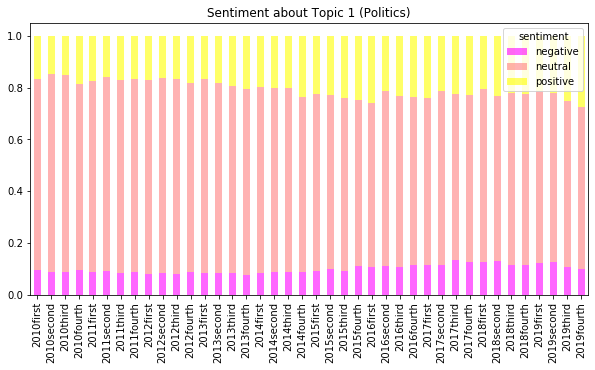

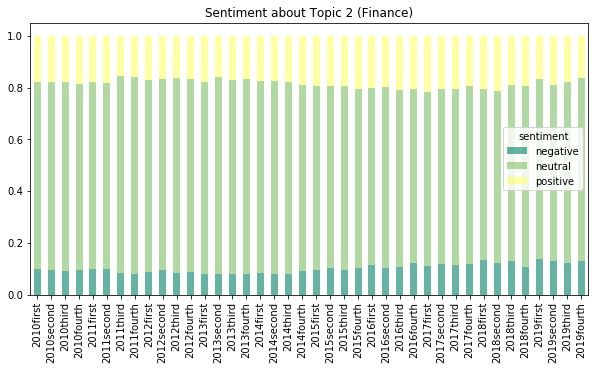

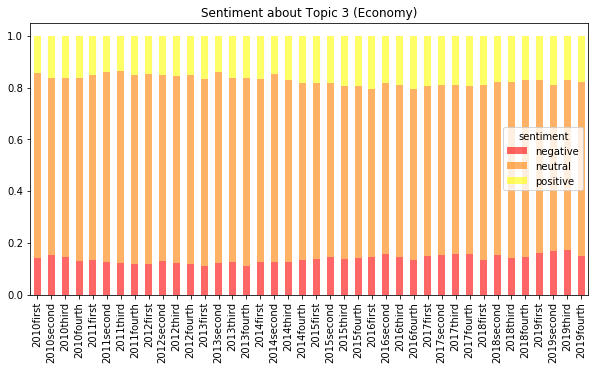

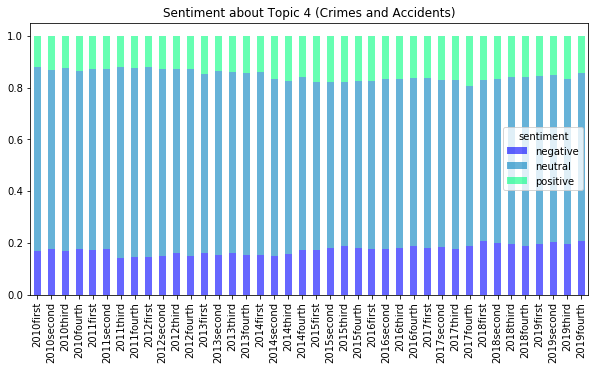

In [75]:
# 100% stacked bar chart for all topics
fig, ax = plt.subplots(figsize=(10,5))
df1_stm_rate.T.plot(kind='bar', alpha=0.6, stacked=True, ax = ax, cmap='spring')
plt.title('Sentiment about Topic 1 (Politics)')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df2_stm_rate.T.plot(kind='bar', alpha=0.6, stacked=True, ax = ax, cmap='summer')
plt.title('Sentiment about Topic 2 (Finance)')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df3_stm_rate.T.plot(kind='bar', alpha=0.6, stacked=True, ax = ax, cmap='autumn')
plt.title('Sentiment about Topic 3 (Economy)')
plt.show()

fig, ax = plt.subplots(figsize=(10,5))
df4_stm_rate.T.plot(kind='bar', alpha=0.6, stacked=True, ax = ax, cmap='winter')
plt.title('Sentiment about Topic 4 (Crimes and Accidents)')
plt.show()

Then the following code creates dataframes by sentiment. This is to show the transition of the number of headlines in each topic by quarter. Line graphs that show the rate of positive, neutral and negative sentiments in each topic are presented below.

In [23]:
# Extract rows with each sentiment from all dataframes and merge them into one dataframe
df_negative = pd.DataFrame()
df_negative = df_negative.append([df1_stm_rate.loc["negative"].to_frame().T, df2_stm_rate.loc["negative"].to_frame().T, df3_stm_rate.loc["negative"].to_frame().T, df4_stm_rate.loc["negative"].to_frame().T])

df_neutral = pd.DataFrame()
df_neutral = df_neutral.append([df1_stm_rate.loc["neutral"].to_frame().T, df2_stm_rate.loc["neutral"].to_frame().T, df3_stm_rate.loc["neutral"].to_frame().T, df4_stm_rate.loc["neutral"].to_frame().T])

df_positive = pd.DataFrame()
df_positive = df_positive.append([df1_stm_rate.loc["positive"].to_frame().T, df2_stm_rate.loc["positive"].to_frame().T, df3_stm_rate.loc["positive"].to_frame().T, df4_stm_rate.loc["positive"].to_frame().T])


# Reset and assign new indexes
df_negative = df_negative.reset_index().drop(columns = ['index'])
df_neutral = df_neutral.reset_index().drop(columns = ['index'])
df_positive = df_positive.reset_index().drop(columns = ['index'])

new_index = ['Politics', 'Finance', 'Economy', 'Crimes and Accidents']
df_negative.index = df_neutral.index = df_positive.index = new_index

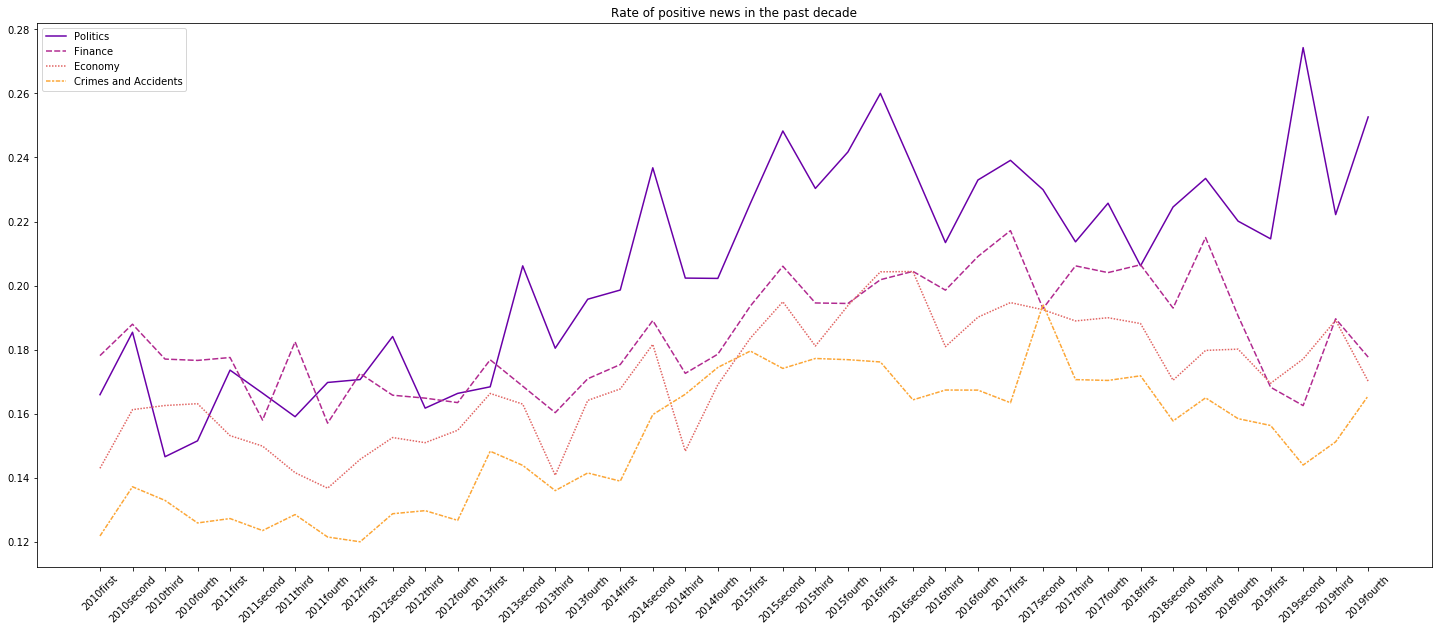

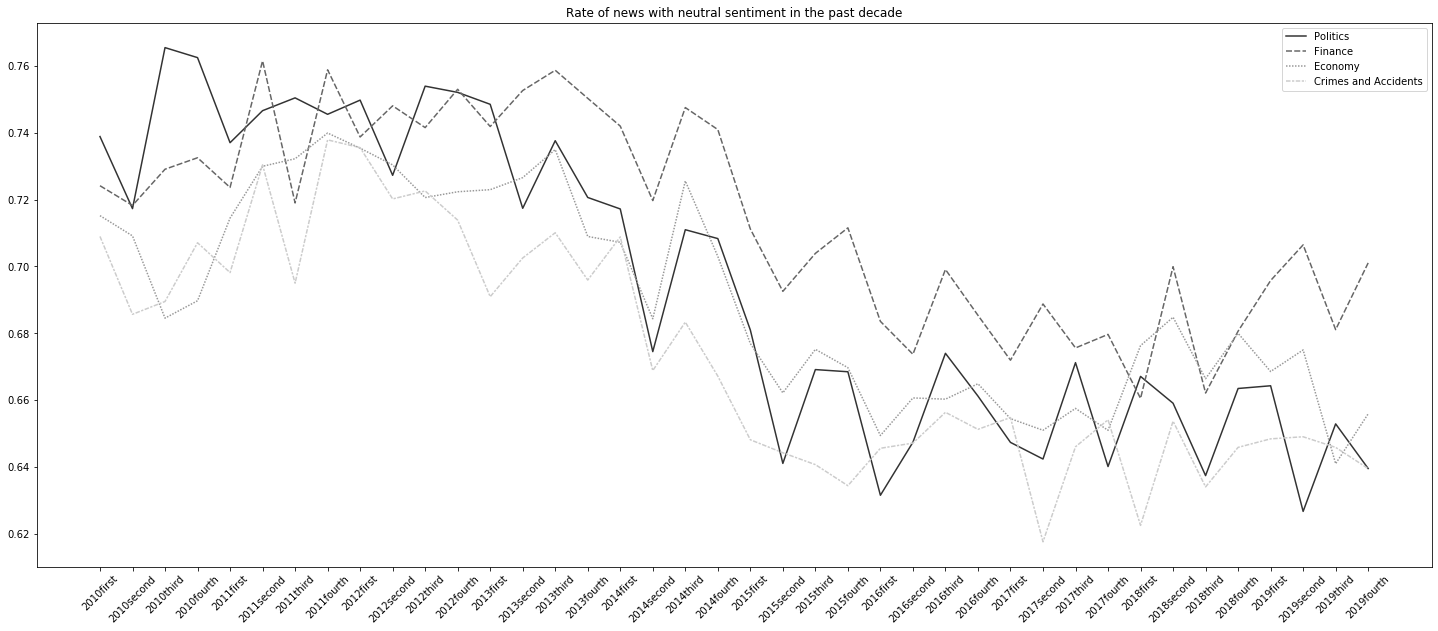

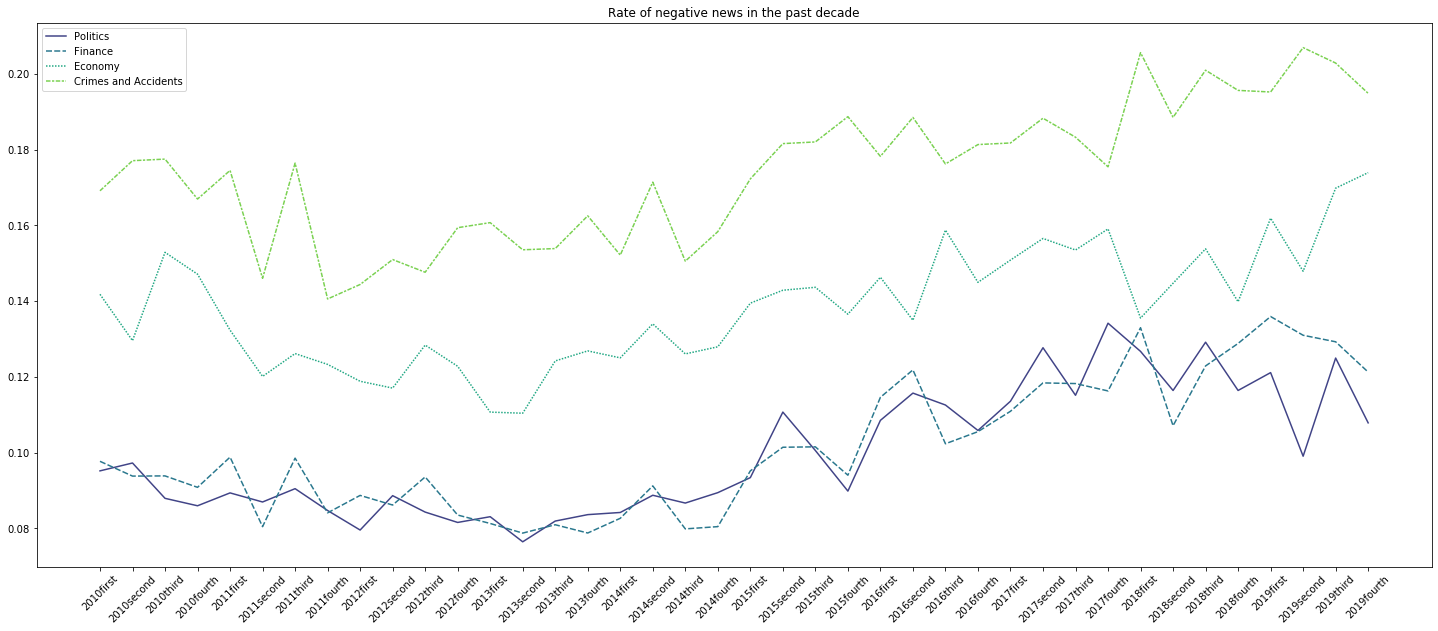

In [37]:
# Graph for positive news
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
sns.lineplot(data = df_positive.T, palette = "plasma")
ax.set_xticklabels(df_positive, rotation = 45)
plt.title('Rate of positive news in the past decade')
plt.show()

# Graph for neutral news
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
sns.lineplot(data = df_neutral.T, palette = "gray")
ax.set_xticklabels(df_neutral, rotation = 45)
plt.title('Rate of news with neutral sentiment in the past decade')
plt.show()

# Graph for negative news
fig = plt.figure(figsize=(25,10))
ax = fig.add_subplot(111)
sns.lineplot(data = df_negative.T, palette = "viridis")
ax.set_xticklabels(df_negative, rotation = 45)
plt.title('Rate of negative news in the past decade')
plt.show()

Interestingly, all four topics show a similar trend to some extent. Although the details of spikes and actual percentages differ, the overall trend in ten years, such as gradually increasing/decreasing, seem to be correlated.

In order to see the correlation between news sentiments and the Australian economy, I combine the data in the past dacade about consumer price index (CPI) (Organization for Economic Co-operation and Development, 2020), gross domestic product (GDP) (Organization for Economic Co-operation and Development, 2020), unemployment rate (Organization for Economic Co-operation and Development, 2020), and housing prices (Bank for International Settlements, 2020). Originally these data has the record of more than a dacade, but is trimmed before reading it on Jupyter Notebook and it only contains data from the beginning of 2010 and the end of 2019. The dataset of unemployed rate was monthly and the following code convert it into quarterly data so that it is aligned with the other data.

In [38]:
# For CPI
df_cpi = pd.read_csv('Consumer_Price_Index_Total_All_Items_for_Australia_n10153900_YuiAndoh.csv')
df_cpi = df_cpi[200:240].rename(columns={"DATE": "Date", "CPALTT01AUQ657N": "Consumer Price Index"}).set_index('Date')

# For GDP
df_gdp = pd.read_csv('Gross_Domestic_Product_by_Expenditure_in_Constant_Prices_n10153900_YuiAndoh.csv')
df_gdp = df_gdp[199:].rename(columns={"DATE": "Date", "NAEXKP01AUQ657S": "Gross Domestic Product"}).set_index('Date')

# For unemployed rate (monthly data)
df_unemployed = pd.read_csv('Harmonized_Unemployment_Rate_n10153900_YuiAndoh.csv')
df_unemployed = df_unemployed[383:503].rename(columns={"DATE": "Date", "LRHUTTTTAUM156S": "Unemployed Rate"}).set_index('Date')

# Average and change the data into quarters
df_unemployed_qrt = (df_unemployed.T.groupby(pd.PeriodIndex(df_unemployed.T.columns, freq='Q'), axis=1).mean().rename(columns=lambda c: str(c).lower()))
df_unemployed_qrt = df_unemployed_qrt.rename(columns=lambda x: re.sub('q1','-01-01', x)).rename(columns=lambda x: re.sub('q2','-04-01', x)).rename(columns=lambda x: re.sub('q3','-07-01', x)).rename(columns=lambda x: re.sub('q4','-10-01', x))

# For housing price
df_estate = pd.read_csv('Real_Residential_Property_Prices_for_Australia_n10153900_YuiAndoh.csv')
df_estate = df_estate[156:].rename(columns={"DATE": "Date", "QAUR368BIS": "Residential Property Prices"}).set_index('Date')

In [39]:
# Swap indexes and columns
df_cpi = df_cpi.transpose()
df_gdp = df_gdp.transpose()
df_estate = df_estate.transpose()

# Combine all economic indicators into one dataframe
df_merged = pd.concat([df_cpi, df_gdp, df_unemployed_qrt, df_estate], axis=0, sort=True)
df_merged

,2010-01-01,2010-04-01,2010-07-01,2010-10-01,2011-01-01,2011-04-01,2011-07-01,2011-10-01,2012-01-01,2012-04-01,...,2017-07-01,2017-10-01,2018-01-01,2018-04-01,2018-07-01,2018-10-01,2019-01-01,2019-04-01,2019-07-01,2019-10-01
Consumer Price Index,0.954401,0.630252,0.730689,0.414508,1.444788,0.915565,0.604839,0.000000,0.100200,0.500501,...,0.632340,0.628366,0.446030,0.355240,0.442478,0.528634,0.000000,0.613497,0.522648,0.693241
Gross Domestic Product,0.503527,0.517838,0.694337,1.021125,-0.269426,1.173372,1.347792,1.145107,0.935578,0.753941,...,1.017360,0.490343,0.910043,0.732109,0.349175,0.162793,0.495032,0.602246,0.551297,0.526511
Unemployed Rate,5.332828,5.291235,5.120284,5.090775,4.972260,4.962946,5.188723,5.205848,5.147595,5.118619,...,5.508688,5.471786,5.523930,5.410832,5.179878,5.045265,5.030782,5.222010,5.232292,5.184875
Residential Property Prices,14.780000,12.130000,6.510000,1.630000,-2.770000,-5.560000,-5.940000,-6.840000,-4.190000,-2.750000,...,6.350000,3.010000,0.120000,-2.640000,-3.730000,-6.810000,-8.580000,-8.870000,-5.280000,NaN


This is the four economic metrics summed up in a dataframe quarterly. In the following, each metric is combined with positive, neutral and negative news rates to find the correlation.

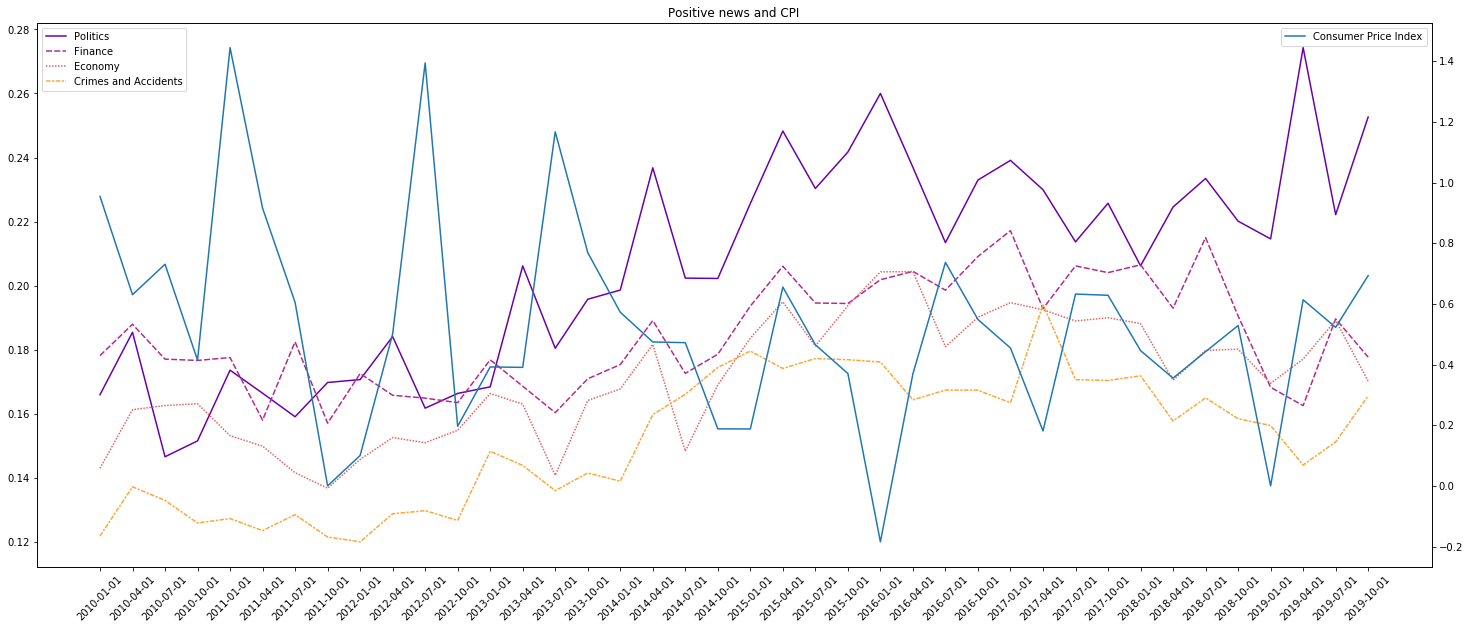

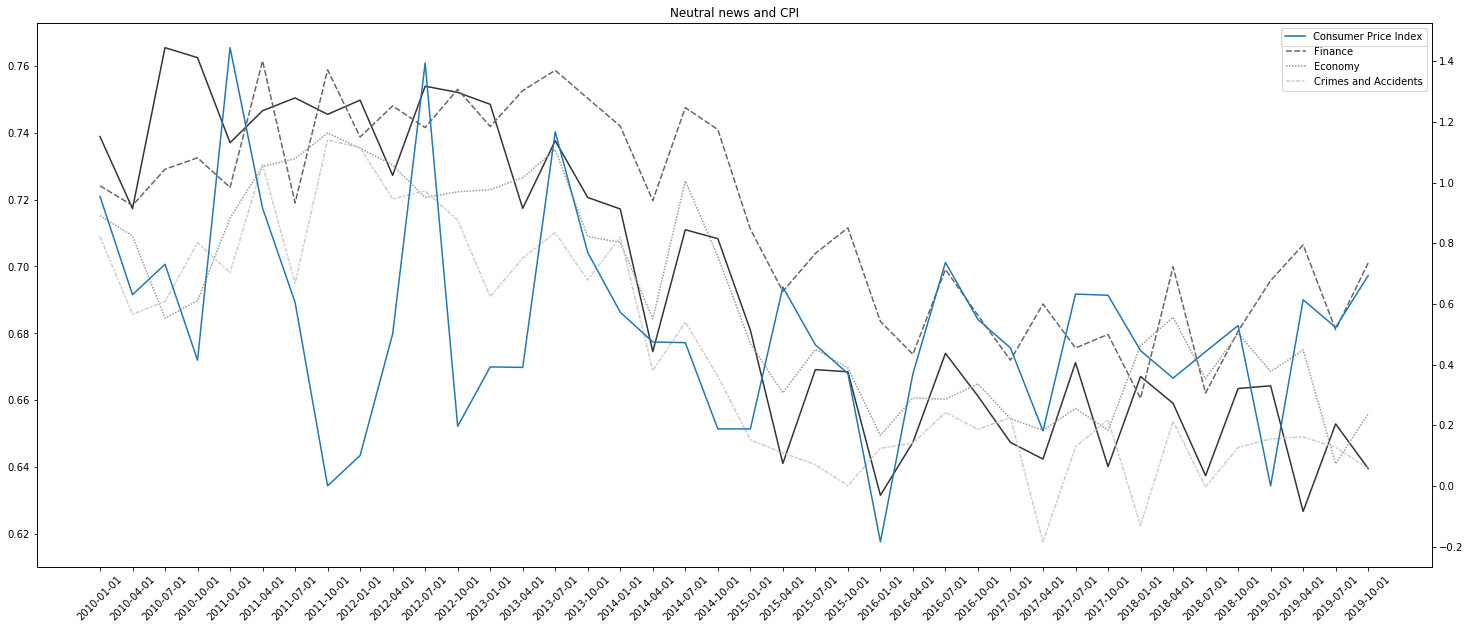

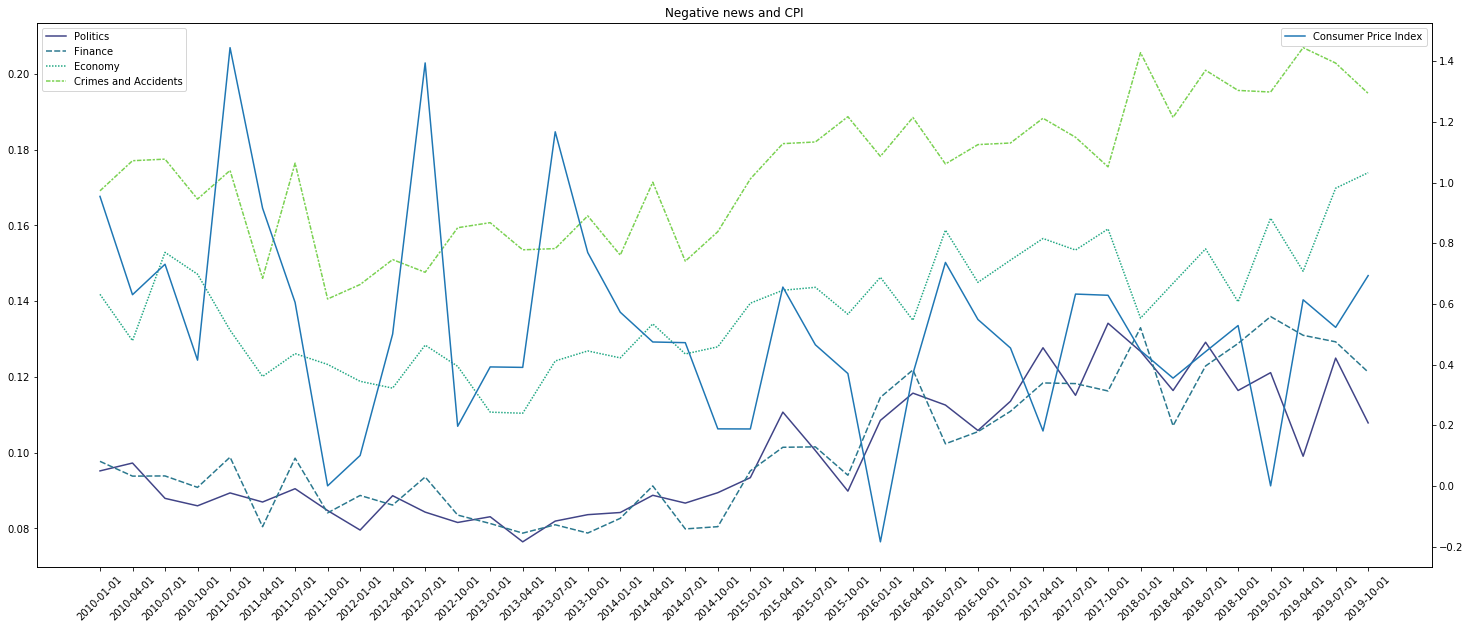

In [42]:
# Each sentiment and CPI

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_positive.T, palette = "plasma")
ax2 = ax1.twinx()
sns.lineplot(data = df_cpi.T, ax=ax2)
ax1.set_xticklabels(df_cpi, rotation = 45)
plt.title("Positive news and CPI")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_neutral.T, palette = "gray")
ax2 = ax1.twinx()
sns.lineplot(data = df_cpi.T, ax=ax2)
ax1.set_xticklabels(df_cpi, rotation = 45)
plt.title("Neutral news and CPI")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_negative.T, palette = "viridis")
ax2 = ax1.twinx()
sns.lineplot(data = df_cpi.T, ax=ax2)
ax1.set_xticklabels(df_cpi, rotation = 45)
plt.title("Negative news and CPI")
plt.show()

The CPI chart is characterized by the flactuation from 2010-07-01 to 2014-01-01, however, none of the three sentiments seems to have impact on/from CPI flactuation. The number of neutral-sentiment news about crimes/accidents and finance seems to show a drop one quarter before the big drop in CPI on 2011-10-01 (which means the news from 2011-07-01 to 2011-09-30), however, it is still in doubt that this has something to do with CPI, as those topics experience similar drops in other times too.

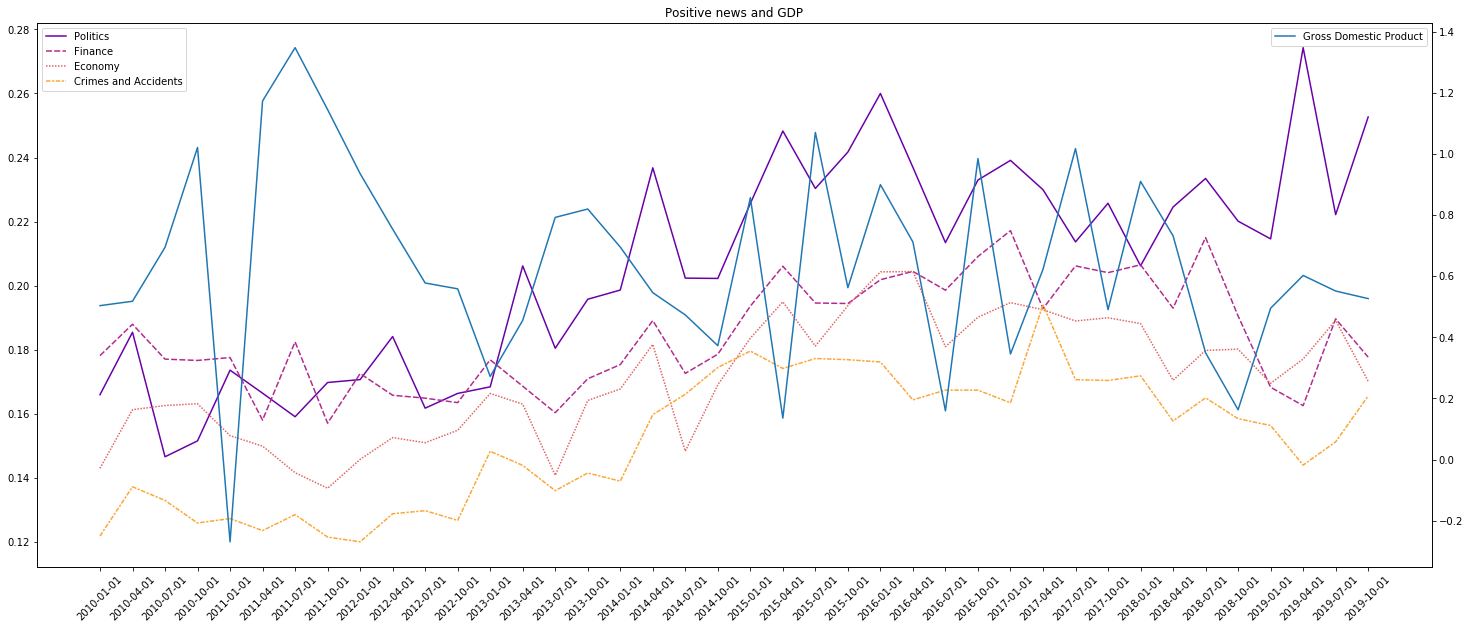

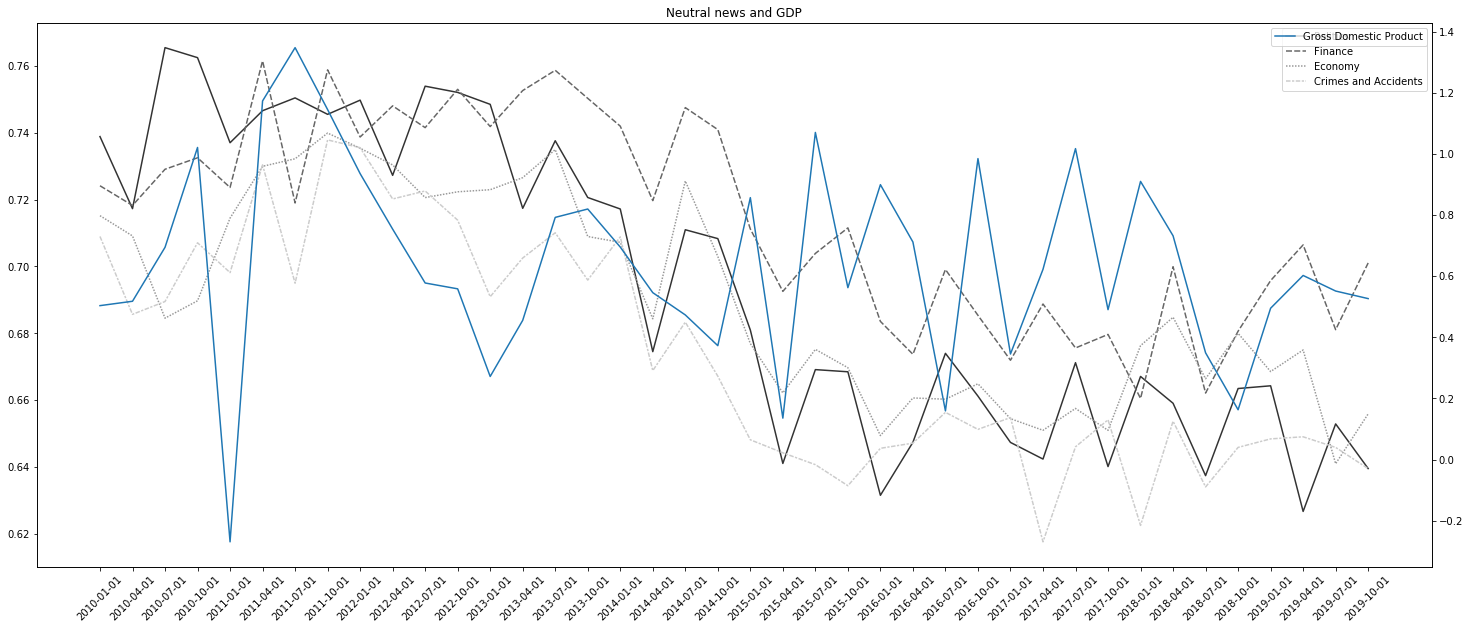

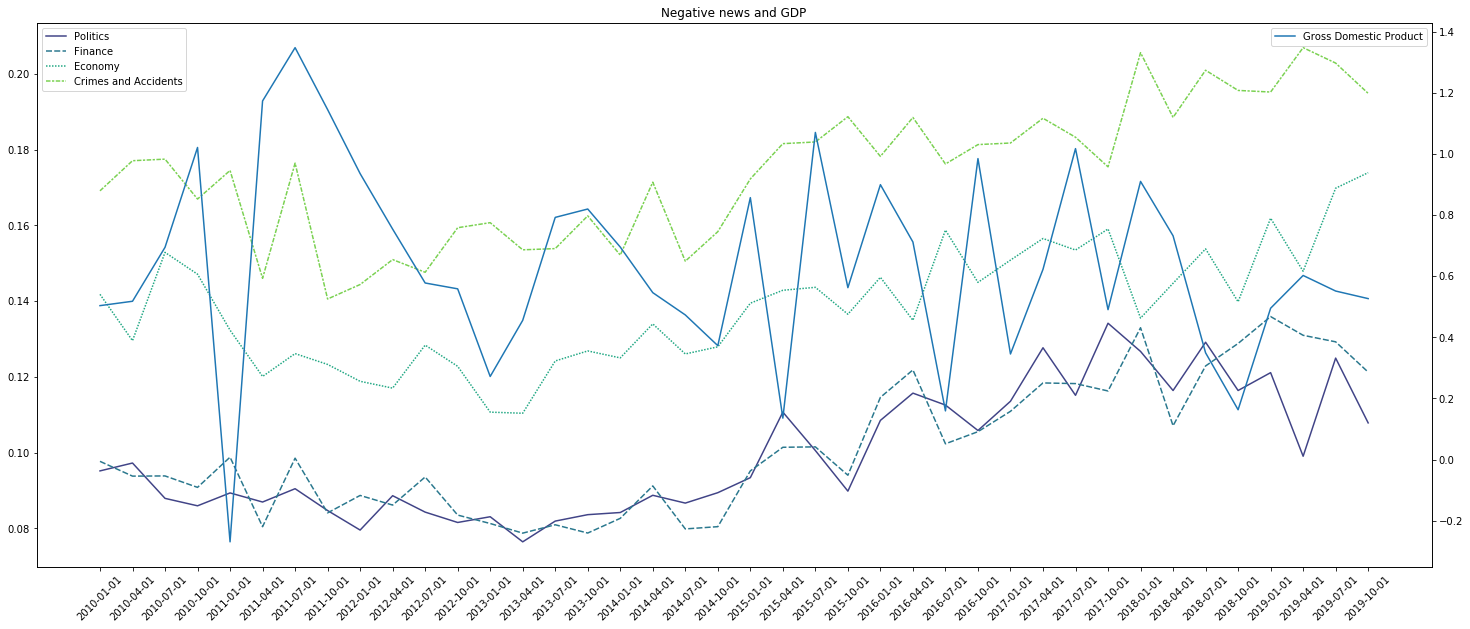

In [43]:
# Each sentiment and GDP

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_positive.T, palette = "plasma")
ax2 = ax1.twinx()
sns.lineplot(data = df_gdp.T, ax=ax2)
ax1.set_xticklabels(df_gdp, rotation = 45)
plt.title("Positive news and GDP")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_neutral.T, palette = "gray")
ax2 = ax1.twinx()
sns.lineplot(data = df_gdp.T, ax=ax2)
ax1.set_xticklabels(df_gdp, rotation = 45)
plt.title("Neutral news and GDP")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_negative.T, palette = "viridis")
ax2 = ax1.twinx()
sns.lineplot(data = df_gdp.T, ax=ax2)
ax1.set_xticklabels(df_gdp, rotation = 45)
plt.title("Negative news and GDP")
plt.show()

GDP shows a sharp drop in 2011-01-01 which is caused by the Queensland flood from November 2010 to January 2011. In that period, negative news about finance and crimes/accidents increased (on 2011-01-01 which means news from 2011-01-01 to 2011-03-31). It is natural considering the news must have reported about the flood a lot (this can be observed in Assignment 1 wordcloud in 2011), however, the negative or even positive sentiment does not show a significant difference because of the flood or the GDP drop.

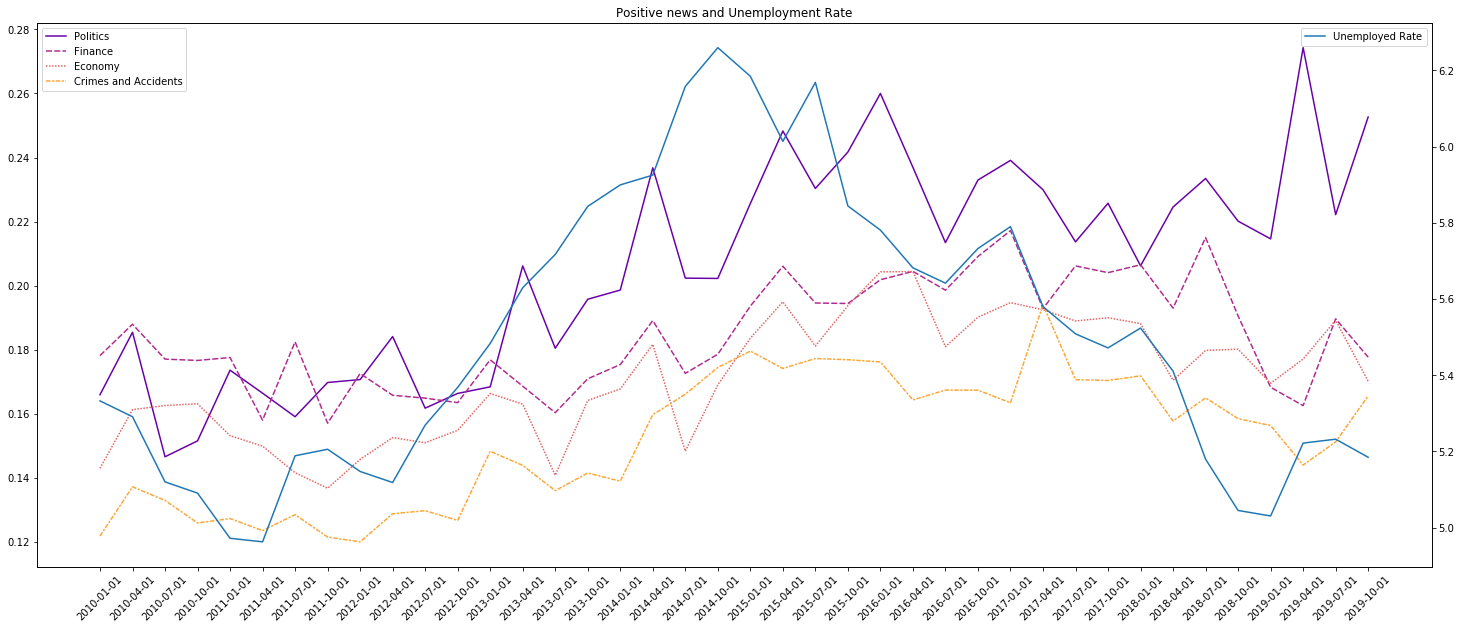

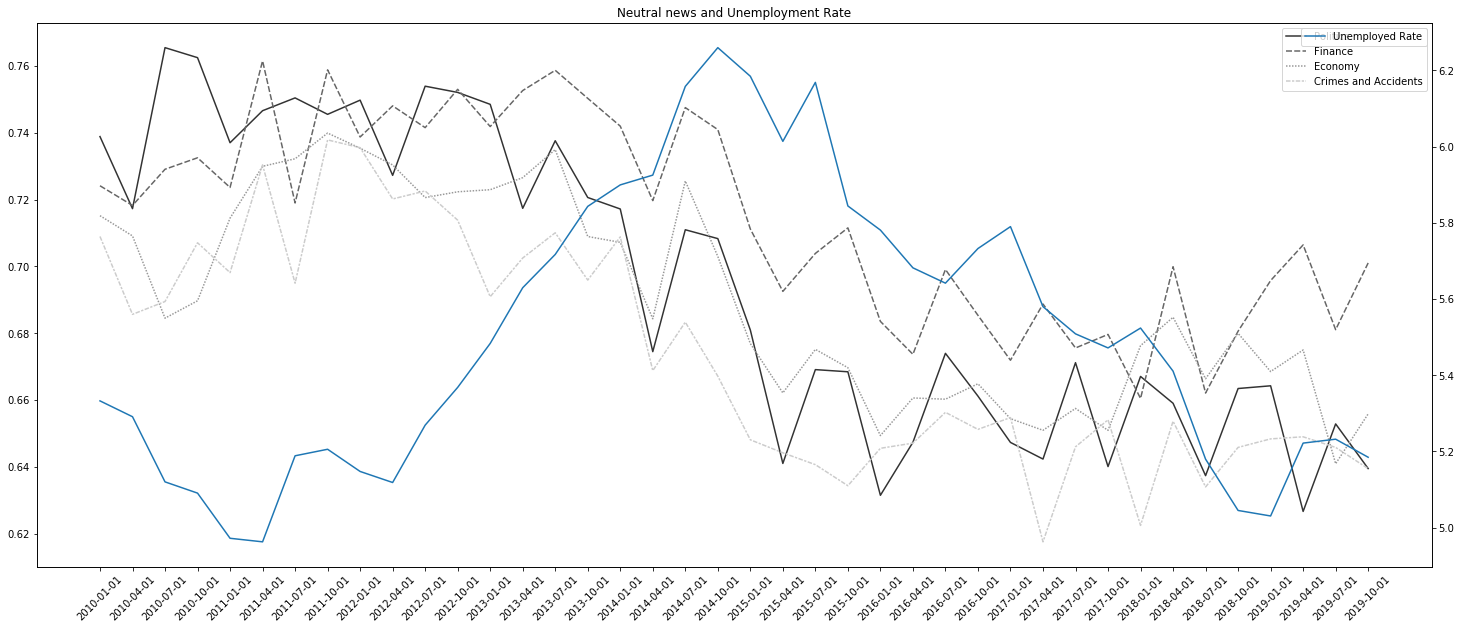

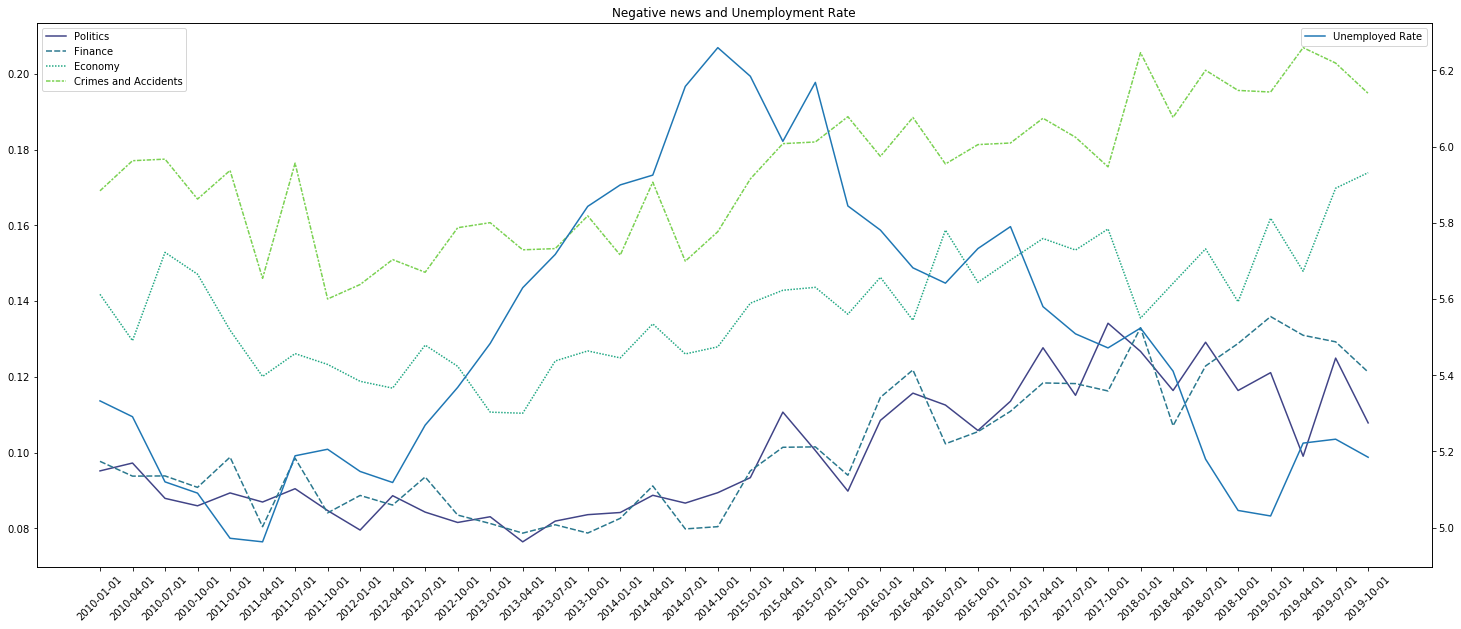

In [76]:
# Each sentiment and unemployment rate

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_positive.T, palette = "plasma")
ax2 = ax1.twinx()
sns.lineplot(data = df_unemployed_qrt.T, ax=ax2)
ax1.set_xticklabels(df_unemployed_qrt, rotation = 45)
plt.title("Positive news and Unemployment Rate")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_neutral.T, palette = "gray")
ax2 = ax1.twinx()
sns.lineplot(data = df_unemployed_qrt.T, ax=ax2)
ax1.set_xticklabels(df_unemployed_qrt, rotation = 45)
plt.title("Neutral news and Unemployment Rate")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_negative.T, palette = "viridis")
ax2 = ax1.twinx()
sns.lineplot(data = df_unemployed_qrt.T, ax=ax2)
ax1.set_xticklabels(df_unemployed_qrt, rotation = 45)
plt.title("Negative news and Unemployment Rate")
plt.show()

In terms of overall trend, unexpectedly, uneployment rate shows similar tendency with the rate of positive news. It has not show a similar trend as the positive news about politics since 2018, however, other topics have ups and downs similar to unemployment rate, although the degree of increase or decrease is not as significant as unemployment rate. For neutral and negative news, there does not seem to be as much correlation as in positive news.

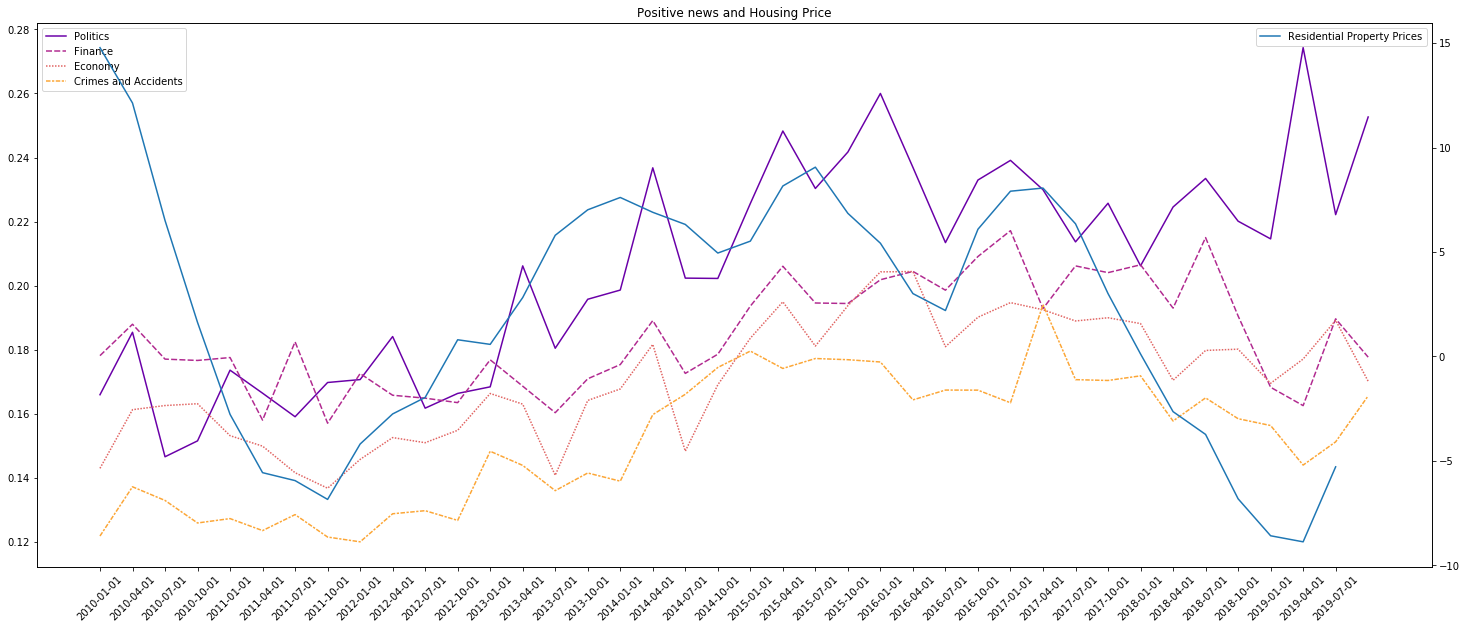

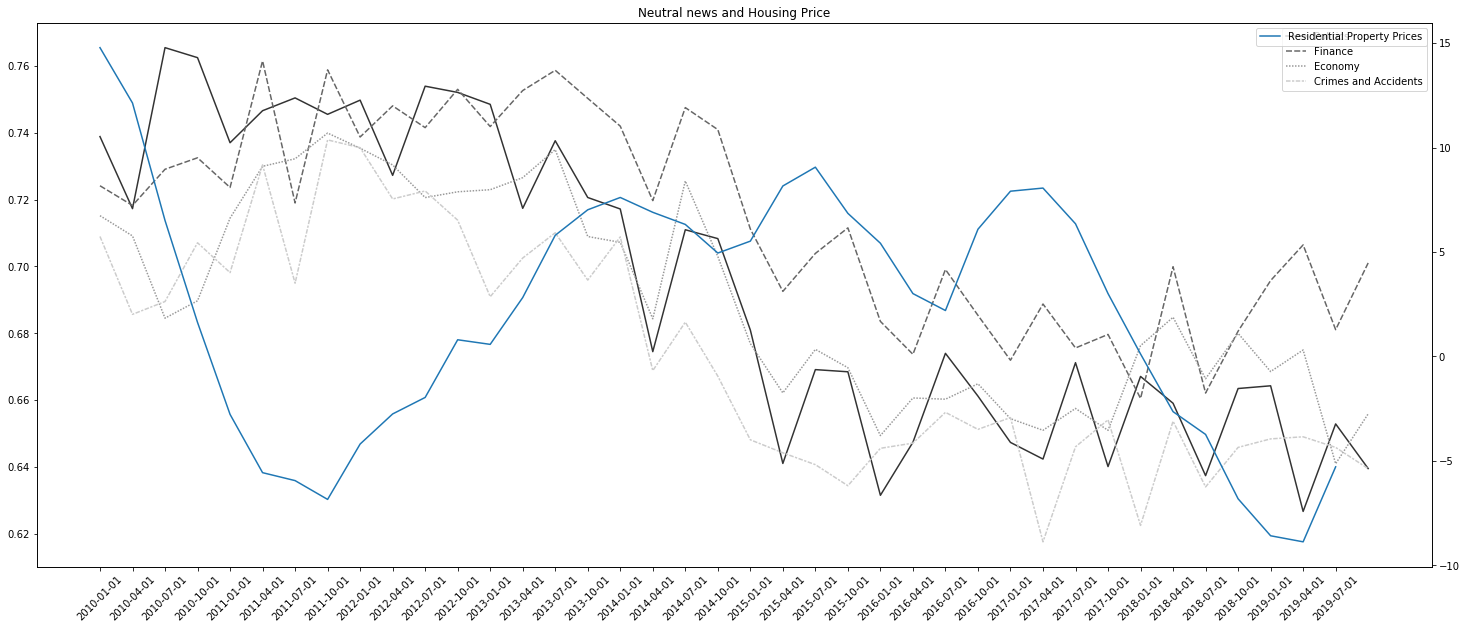

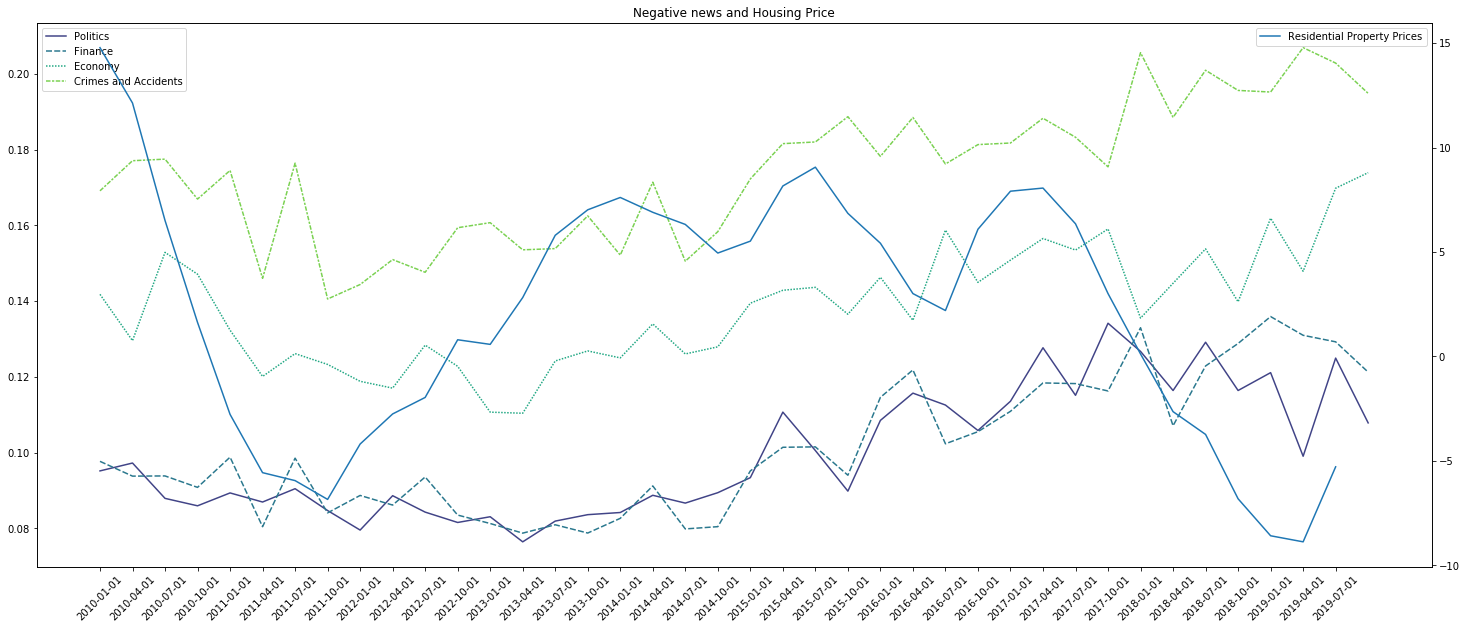

In [77]:
# Each sentiment and housing price

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_positive.T, palette = "plasma")
ax2 = ax1.twinx()
sns.lineplot(data = df_estate.T, ax=ax2)
ax1.set_xticklabels(df_estate, rotation = 45)
plt.title("Positive news and Housing Price")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_neutral.T, palette = "gray")
ax2 = ax1.twinx()
sns.lineplot(data = df_estate.T, ax=ax2)
ax1.set_xticklabels(df_estate, rotation = 45)
plt.title("Neutral news and Housing Price")
plt.show()

fig = plt.figure(figsize=(25,10))
ax1 = fig.add_subplot(111)
sns.lineplot(data = df_negative.T, palette = "viridis")
ax2 = ax1.twinx()
sns.lineplot(data = df_estate.T, ax=ax2)
ax1.set_xticklabels(df_estate, rotation = 45)
plt.title("Negative news and Housing Price")
plt.show()

Australian housing prices slumped twice in the past decade; the first was in 2011 and the second was in 2018. The first slump is caused by the global economic uncertainty according to The Sydney Morning Herald (2012), and the second one by financial regulator Australian Prudential Regulation Authority who tightened lending criteria. Based on these incidents, it can be assumed that the housing price may have an impact from/on economic or financial news. In fact, the trend of positive news about economy and finance is similar to the housing price transition. Positive news about politics partly shows a similar trend as well, but it does not show a significant drop in 2011 and 2018. On contrast, negative news about crimes/accidents shows an increase when the housing price drops.

## 4. Insight and Limitation
The main findings obtained from the comparison of news sentiment and economic indicators are as follows: 
- CPI does not seem to relate to news sentiment much.
- Negative news about finance and crimes/accidents increased when GDP dropped; however, the number of negative news does not seem to have increased significantly as the GDP drop.
- Uneployment rate shows similar tendency with the rate of positive news overall.
- Positive news about economy and finance shows a similar trend with the housing price transition. 
- Negative news about crimes/accidents shows an increase when the housing price drops.

There is not much correlation observed in comparisons of CPI, GDP and news sentiment; however, unemployment rate and housing price seem to be correlated to news sentiment to some extent. One possible reason for this could be because unemployment rate or housing prices have more to do with people's daily lives. GDP and CPI affect people too, yet those indicators are more for indicating the country's economic status and have less direct effect over people. 

The correlation between the housing prices and positive news about economy/finance is expected, and the analysis shows an evidence of the correlation. When there is a positive news about economy and finances, the housing prices rise, probably because of optimistic view about the economy and hence the more demand for investment in housing. This will, for example, give a real estate industry an insight of when to be prepared for the increase or decrease of sales by keeping an eye on the news sentiment about Australian economy and finance. Another interesting and also unexpected finding here is that unemployment rate seems to be correlated with positive news and not with negative news. In order to find the reason of this correlation, the analysis could go into a further topic modeling using the data of headlines categorized to be positive in each topic to see what exactly the news reports. However, due to the time constraint, further analysis is left for the future research.

There are some findings about the result of topic modeling itself as well.
- All four topics (politics, economy, finance, and crimes/accidents) show a similar overall trend.
- The percentage of news sentiment does not change significantly overall in any topics.

By seeing all topics showing similar trends in all sentiment groups, it can be said that they relate to each other, and supposing news topics are what people talk about or are interested in at the time, this result means people can become optimistic/pessimistic in other topics when one topic shows a positive/negative sentiment. In this way, it can imply that people have similar sentiment for various topics and their sentiments in different topics are not completely independent. However, it is good to note that the reason of topics showing a simiar trend in all sentiment can be because of the wording of headlines as the topic model categorizes headlines based on the words used, and might have something to do with the writers in charge in that time period.

The reason for the second item might be because news is supposed to be reported objectively. In fact, 60 to 70% of all headlines are categorized in the neutral sentiment group. However, at the same time, these two findings, as well as the coherence scores of the topic model, raise a question about the topic model created in the analysis. Although the number of topics are chosen based on the coherence scores, it is still possible that the model did not sort the headlines properly. This may stem from the nature of headlines to be short and intriguing, and the analysis might possibly be able to deliver a better topic model by providing a dataset with the article itself which contains more information about the headline and the incident that it describes. When it comes to economy, politics and finance, it can be hard to categorize even for human just by seeing the headline, because they interrelate with each other in many cases. By feeding more news data to the model, including news articles, can enhance the coherence scores and accuracy of topic categorization.

This analysis suggests that the sentiment of news topics can correlate to each other, and the economic indicators that directly contribute to people's daily lives can show similar tendencies especially with the sentiment about economic and financial related news. Further research and analysis with more data is required to conclude this, and despite that, this can be a suggestion for businesses to be attentive to the latest information from these economic indicators and news sentiment so that they can anticipate the economic situation in Australia or the sentiment that people have in mind. They may not have a direct influence toward each other, however, it will help businesses to plan risk management or a strategy for a business chance in the long run. This result will enable a company to know when to expand their business or when to wait for greater opportunities and prepare for them, by paying attention to people's sentiment through news and foreseeing future economic trend.

## 5. References

Bank for International Settlements. (2020). *Real Residential Property Prices for Australia [QAUR368BIS]* Source. https://fred.stlouisfed.org/series/QAUR368BIS

Kulkarni, & Rohit. (2018) *A Million News Headlines.* Source. https://www.kaggle.com/therohk/million-headlines

Organization for Economic Co-operation and Development. (2020). *Consumer Price Index of All Items in Australia [AUSCPIALLQINMEI].* Source. https://fred.stlouisfed.org/series/AUSCPIALLQINMEI

Organization for Economic Co-operation and Development. (2020). *Harmonized Unemployment Rate: Total: All Persons for Australia [LRHUTTTTAUM156S].* Source. https://fred.stlouisfed.org/series/LRHUTTTTAUM156S

Organization for Economic Co-operation and Development. (2020). *Gross Domestic Product by Expenditure in Constant Prices: Total Gross Domestic Product for Australia [NAEXKP01AUQ657S].* Source. https://fred.stlouisfed.org/series/NAEXKP01AUQ657S

The Sydney Morning Herald (2012, February 1). *Record slump in house prices in 2011.* Retrieved from https://www.smh.com.au/business/companies/record-slump-in-house-prices-in-2011-20120201-1qsid.html#:~:text=Australian%20house%20prices%20plunged%20by,kept%20a%20lid%20on%20demand.